In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../MESA-grid/minisaurus_new.csv")

In [25]:
df.iloc[:].query("surf_avg_v_rot<200")

,star_mass,logL,log_R,log_g,surf_avg_omega_div_omega_crit,surf_avg_v_rot,profile_number,Myr,m,z,...,n3ell1dfreq,n4ell1dfreq,n5ell1dfreq,n6ell1dfreq,n7ell1dfreq,n8ell1dfreq,n9ell1dfreq,n10ell1dfreq,Dnu,eps
0,1.20,0.645687,0.280240,3.956769,0.000000,0.000000,28,5.100000,1.20,0.001,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.934,0.865
1,1.20,0.661551,0.277066,3.963117,0.000000,0.000000,29,5.287500,1.20,0.001,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.942,0.885
2,1.20,0.676037,0.272535,3.972178,0.000000,0.000000,30,5.475000,1.20,0.001,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.951,0.931
3,1.20,0.689324,0.266633,3.983982,0.000000,0.000000,31,5.662500,1.20,0.001,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.965,0.993
4,1.20,0.701538,0.259162,3.998924,0.000000,0.000000,32,5.850000,1.20,0.001,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.997,1.060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679460,2.22,1.352888,0.573806,3.636809,0.517563,169.995870,26,4.867846,2.22,0.026,...,0.82696,0.83125,0.83377,0.83383,0.83401,0.83422,0.83483,0.83595,1.893,2.181
2679461,2.22,1.413063,0.553259,3.677902,0.571881,191.154180,27,5.055346,2.22,0.026,...,0.96579,0.97173,0.97507,0.97519,0.97529,0.97533,0.97601,0.97742,1.955,2.501
2679481,2.22,1.124313,0.285256,4.213909,0.435836,199.751883,47,8.805346,2.22,0.026,...,1.91485,1.91060,1.91001,1.91603,1.92315,1.92873,1.93282,1.93660,5.414,1.704
2679594,2.22,1.284532,0.594350,3.595721,0.535193,171.555392,25,4.680346,2.22,0.026,...,0.79087,0.79313,0.79625,0.79833,0.79887,0.79960,0.80092,0.80253,1.890,1.761


In [24]:
len(df.query("surf_avg_v_rot>300"))/len(df)

0.10358382736613353

In [46]:
def plot_echelle(freq, Dnu, ell=0, freq_m=None, freq_p=None):
    colors = ('black', '#8B3A3A')
    colors2 = ('#EE6363', '#8B3A3A', '#EE6363')
    if ell == 0:
        x = freq%Dnu
        y = freq
        plt.plot(x, y, 'o', 
                mfc=colors[ell], mec=colors[ell], alpha=0.85,
                ms=6, mew=1, 
                label=str(ell))
    else:
        x = freq%Dnu
        y = freq
        plt.plot(x, y, 'o',
                mfc=colors2[0], mec=colors2[0], alpha=0.85,
                ms=6, mew=1,
                label=str(ell))
        x = freq_p%Dnu
        y = freq
        plt.plot(x, y, '+',
                mfc=colors2[1], mec=colors2[1], alpha=0.85,
                ms=6, mew=1)
        plt.plot(x, y, 'o',
                mfc=colors2[1], mec=colors2[1], alpha=0.85,
                ms=2, mew=1)
        x = freq_m%Dnu
        y = freq
        plt.plot(x, y, '_',
                mfc=colors2[2], mec=colors2[2], alpha=0.85,
                ms=6, mew=1)
        plt.plot(x, y, 'o',
                mfc=colors2[2], mec=colors2[2], alpha=0.85,
                ms=2, mew=1)

        plt.legend(title='$\u2113$', loc='upper right')

        plt.axvline(Dnu, ls='--', c='darkgray', zorder=-99)

        plt.ylabel(r'Frequency, $d^{-1}$')
        plt.xlabel(r'$\nu\; \rm{mod}\; \Delta\nu/d^{-1}$')

surf_avg_v_rot: 299.12070558950217  km/s


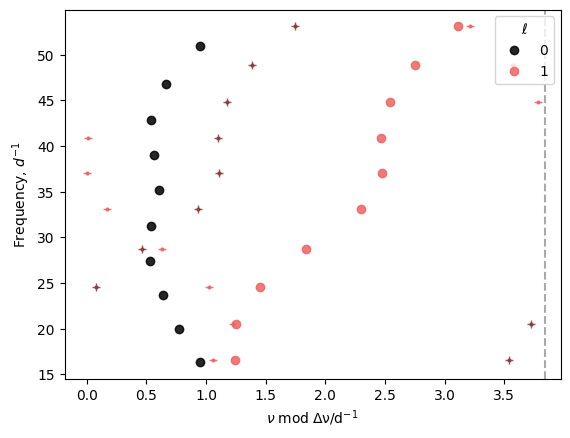

In [56]:
ind = -12

freq = []
dff = df.query("surf_avg_v_rot<300").iloc[ind]
print("surf_avg_v_rot:", dff["surf_avg_v_rot"], " km/s")
# Dnu = dff["Dnu"]

l = 0
for n in range(1, 11):
    freq.append(dff[f"n{n}ell{l}m0"])

Dnu = np.mean(np.diff(freq))
plot_echelle(freq, Dnu, ell=0)

freq = []
freq_p = []
freq_m = []
l = 1
for n in range(1, 11):
    freq.append(dff[f"n{n}ell{l}m0"])
    freq_p.append(dff[f"n{n}ell{l}dfreq"] + dff[f"n{n}ell{l}m0"])
    freq_m.append(dff[f"n{n}ell{l}dfreq"] - dff[f"n{n}ell{l}m0"])
plot_echelle(freq, Dnu, ell=1, freq_p=freq_p, freq_m=freq_m)
# plt.ylim([0, 60])
# plt.xlim([0, 4])
plt.show()